<a href="https://colab.research.google.com/github/AAhmadS/convex_opt/blob/main/convexOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import matplotlib
import numpy as np
import scipy
import random
import pandas as pd

from numpy import pad
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%mkdir /content/drive/MyDrive/cOpt
%cd /content/drive/MyDrive/cOpt

mkdir: cannot create directory ‘/content/drive/MyDrive/cOpt’: File exists
/content/drive/MyDrive/cOpt


#Load data

In [4]:
data = pd.read_csv('house_data.csv')

In [5]:
data.head(5)

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
0,152,1,3,3,0,0,0,0,1,981653.9936
1,142,1,2,23,0,0,1,0,0,870284.3499
2,64,1,2,26,0,0,0,0,1,515868.5989
3,156,2,3,37,0,0,0,0,1,979655.8731
4,121,4,2,24,0,0,1,0,0,859453.6265


In [6]:
data["place"] = ['Tehran' for x in data['Tehran']]
data["place"][data['Esfehan'] == 1] = 'Esfehan'
data["place"][data['Yazd'] == 1] = 'Yazd'
data["place"][data['Shiraz'] == 1] = 'Shiraz'
data["place"][data['Tabriz'] == 1] = 'Tabriz'

<ipython-input-6-a03fe5c3958c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["place"][data['Esfehan'] == 1] = 'Esfehan'
<ipython-input-6-a03fe5c3958c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["place"][data['Yazd'] == 1] = 'Yazd'
<ipython-input-6-a03fe5c3958c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["place"][data['Shiraz'] == 1] = 'Shiraz'
<ipython-input-6-a03fe5c3958c>:5: SettingWithCopyWarning: 
A va

In [7]:
data.head(10)

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price,place
0,152,1,3,3,0,0,0,0,1,981653.9936,Tabriz
1,142,1,2,23,0,0,1,0,0,870284.3499,Yazd
2,64,1,2,26,0,0,0,0,1,515868.5989,Tabriz
3,156,2,3,37,0,0,0,0,1,979655.8731,Tabriz
4,121,4,2,24,0,0,1,0,0,859453.6265,Yazd
5,70,4,3,49,0,0,0,1,0,570964.5346,Shiraz
6,152,3,3,19,0,1,0,0,0,931339.0588,Esfehan
7,171,2,2,25,0,0,1,0,0,957482.5839,Yazd
8,124,1,2,21,1,0,0,0,0,858480.4773,Tehran
9,137,2,1,12,0,0,0,1,0,876345.6038,Shiraz


#Plot distribution of price within each categorical data

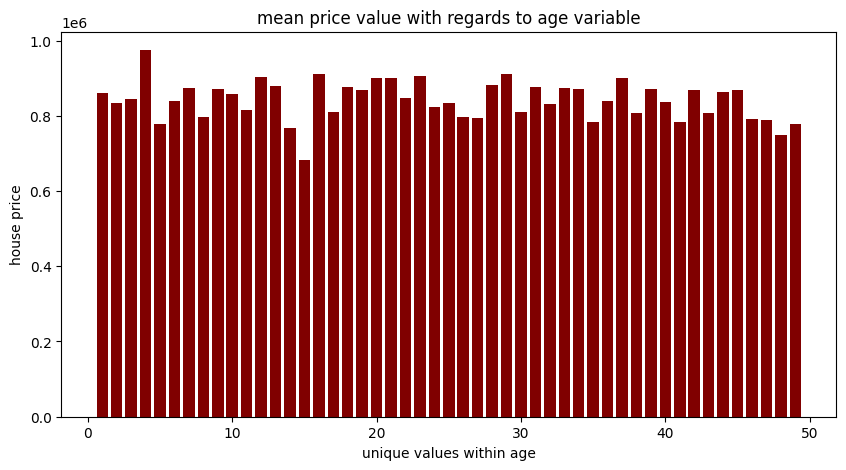

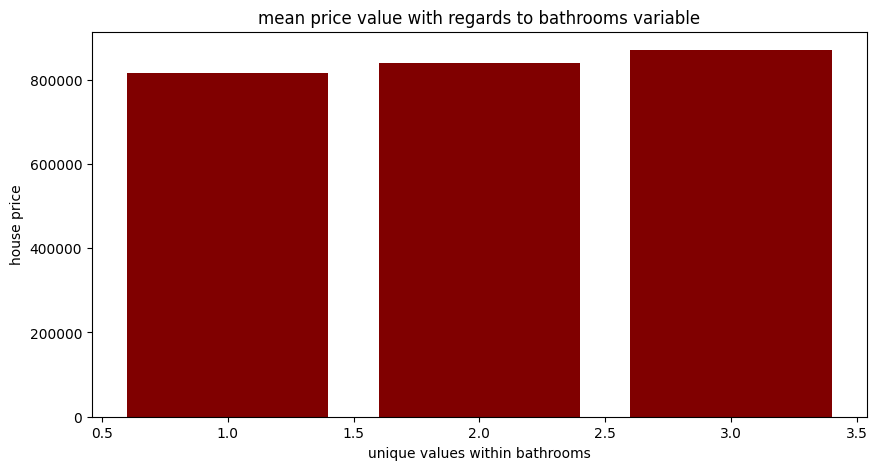

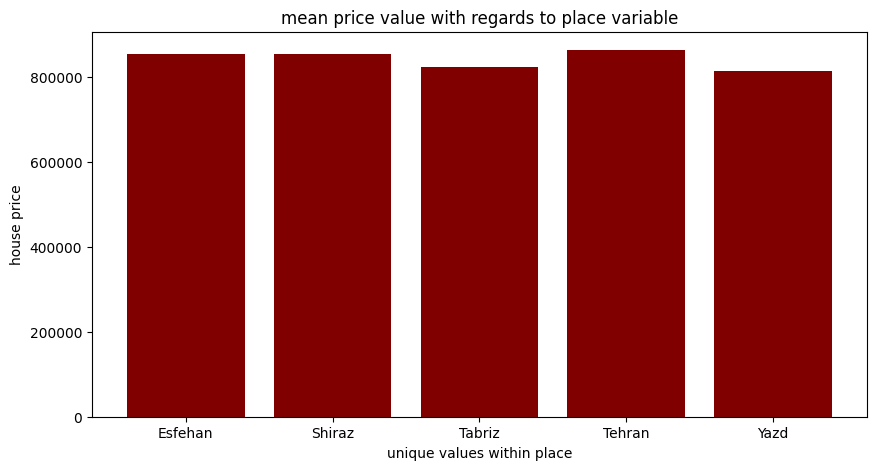

In [8]:
for x in ["age","bathrooms","place"] :
  data2 = data[["price",x]].groupby(by=x).mean()

  courses = list(data2.index)
  values = list(data2["price"])

  fig = plt.figure(figsize=(10, 5))

  # creating the bar plot
  plt.bar(courses, values, color='maroon')

  plt.xlabel(f"unique values within {x}")
  plt.ylabel(f"house price")
  plt.title(f"mean price value with regards to {x} variable")
  plt.show()

#Train-Test split

In [9]:
train_indices = random.sample(list(np.arange(data.shape[0])),int(0.85*data.shape[0]))
test_indices = [ind for ind in list(np.arange(data.shape[0])) if ind not in train_indices]
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

In [10]:
numerical = ['size','bedrooms','bathrooms','age']
for var in numerical:
  mean_var = data[var].mean()
  std_var = np.std(data[var])
  print(f"mean value and std related to {x} variable within data is being :{mean_var},{std_var}")
  print("-"*20)
  train_data[var] = [(x - mean_var)/std_var for x in train_data[var]]
  test_data[var] = [(x - mean_var)/std_var for x in test_data[var]]

mean value and std related to place variable within data is being :125.846,43.76501209870734
--------------------
mean value and std related to place variable within data is being :2.473,1.1132254937792254
--------------------
mean value and std related to place variable within data is being :1.961,0.8046607981006655
--------------------
mean value and std related to place variable within data is being :25.576,14.197472451109034
--------------------


<ipython-input-10-73188c3a812e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[var] = [(x - mean_var)/std_var for x in train_data[var]]
<ipython-input-10-73188c3a812e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[var] = [(x - mean_var)/std_var for x in test_data[var]]


In [11]:
train_data.head(5)

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price,place
135,-0.042180,1.371690,0.048468,-0.463181,0,1,0,0,0,8.506026e+05,Esfehan
460,0.529053,-0.424891,0.048468,1.649871,0,0,1,0,0,9.493913e+05,Yazd
763,-0.156426,1.371690,0.048468,0.311605,0,1,0,0,0,8.472795e+05,Esfehan
85,1.351628,0.473399,0.048468,-0.181441,0,0,0,0,1,1.080046e+06,Tabriz
343,-0.567714,0.473399,1.291227,1.438566,0,0,0,0,1,6.632608e+05,Tabriz


#MSE

In [12]:
def mse(y_true,y_pred):
  return sum(np.power(([x-y for (x,y) in zip(y_true,y_pred)]),2))/len(y_true) , 2*(sum(([x-y for (x,y) in zip(y_true,y_pred)]))/len(y_true) )

In [13]:
mse([1,2,3],[0,0,0])

(4.666666666666667, 4.0)

#SGD func

In [260]:
def SGD(X,y,w,b,learning_rate):
  y_pred = np.matmul(X,w) +b
  loss,grad = mse(y,y_pred)
  b_gradient = grad
  w_gradient = 2 * np.sum(X.T @ (y - y_pred)) / len(y)
  b = b + (learning_rate * b_gradient)
  w = w + (learning_rate * w_gradient)
  return w,b,loss

In [261]:
X = train_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]].to_numpy()
y = np.array(train_data['price']).reshape((-1,1))
b = 1
w = np.random.randn(X.shape[1],1)

In [262]:
SGD(X,y,w,b,0.01)

(array([[21814.16420387],
        [21813.36343505],
        [21813.44559319],
        [21814.09396357],
        [21813.26803108],
        [21813.15613768],
        [21813.09298085],
        [21812.5381208 ],
        [21813.54130905]]),
 array([16873.13790501]),
 array([7.62075402e+11]))

#GradientDescentLinearRegression

In [263]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.001, epoch=1000,batch_size =64):
        self.learning_rate, self.epoch, self.batch= learning_rate, epoch, batch_size

    def fit(self, X, y):
        self.b = 1
        self.w = np.random.randn(X.shape[1],1)
        n = X.shape[0]
        losses = []
        for e in range(self.epoch):
          batch_ind = self.batched(n)
          total_loss = 0
          for b in batch_ind:
            X_t,y_t = X.iloc[b].to_numpy(), np.array(pd.DataFrame(y).iloc[b]).reshape((-1,1))
            self.w, self.b,loss = SGD(X_t, y_t, self.w, self.b, self.learning_rate)
            total_loss+=loss
          losses.append(total_loss)

        return losses

    def predict(self, X):
        X.to_numpy()
        return X@self.w + self.b

    def batched(self,leng):
      random_list = np.arange(leng)
      np.random.shuffle(random_list)
      batches_ind = []
      for ind in range(0,self.batch):
        beg_ind = int(ind*leng/self.batch)
        end_ind = int((ind+1)*leng/self.batch)
        batches_ind.append(random_list[beg_ind:end_ind])
      return batches_ind

In [264]:
X = train_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]]
y = train_data['price']
GDLR = GradientDescentLinearRegression(0.01,100,4)
losses = GDLR.fit(X,y)

In [265]:
X_test = test_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]]
y_test = test_data['price']
test_pred = GDLR.predict(X_test)
mse(y_test,test_pred)

In [269]:
X = train_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]]
y = train_data['price']
train_pred = GDLR.predict(X)
mse(y,train_pred)

(851205582.3761928, 2001.4178296470586)

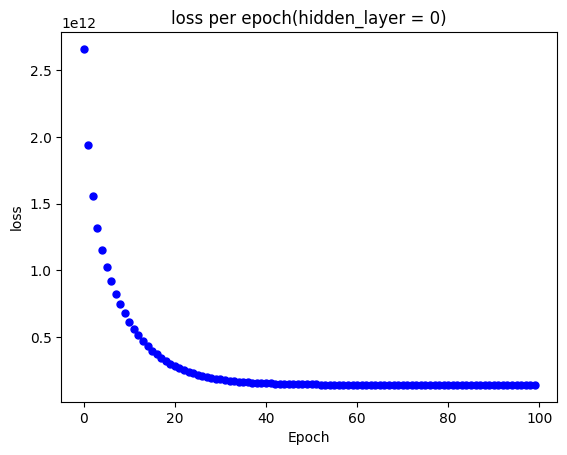

In [267]:
train_label = "train_loss"
X = np.arange(len(losses))
y1 = losses
plt.plot(X,y1,'bo',linewidth =1 , markersize = 5)
plt.title("loss per epoch(hidden_layer = 0)")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()